In [343]:
import pandas as pd

In [344]:
df = pd.read_csv('titanic_train.csv')

In [345]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [347]:
import warnings
warnings.filterwarnings('ignore')


In [348]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [349]:
df.describe() #4

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [350]:
len(df[df["Sex"] == "male"]), len(df[df["Sex"] == "female"]) #7

(577, 314)

In [351]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [352]:
pd.crosstab(df['Pclass'], df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [353]:
pd.crosstab(df['Pclass'] == 2, df['Sex'] == "male") # Отвтет 108

Sex,False,True
Pclass,,
False,238,469
True,76,108


In [354]:
round(df['Fare'].median(), 2),  round(df['Fare'].std(), 2)

(14.45, 49.69)

# визуализация


In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

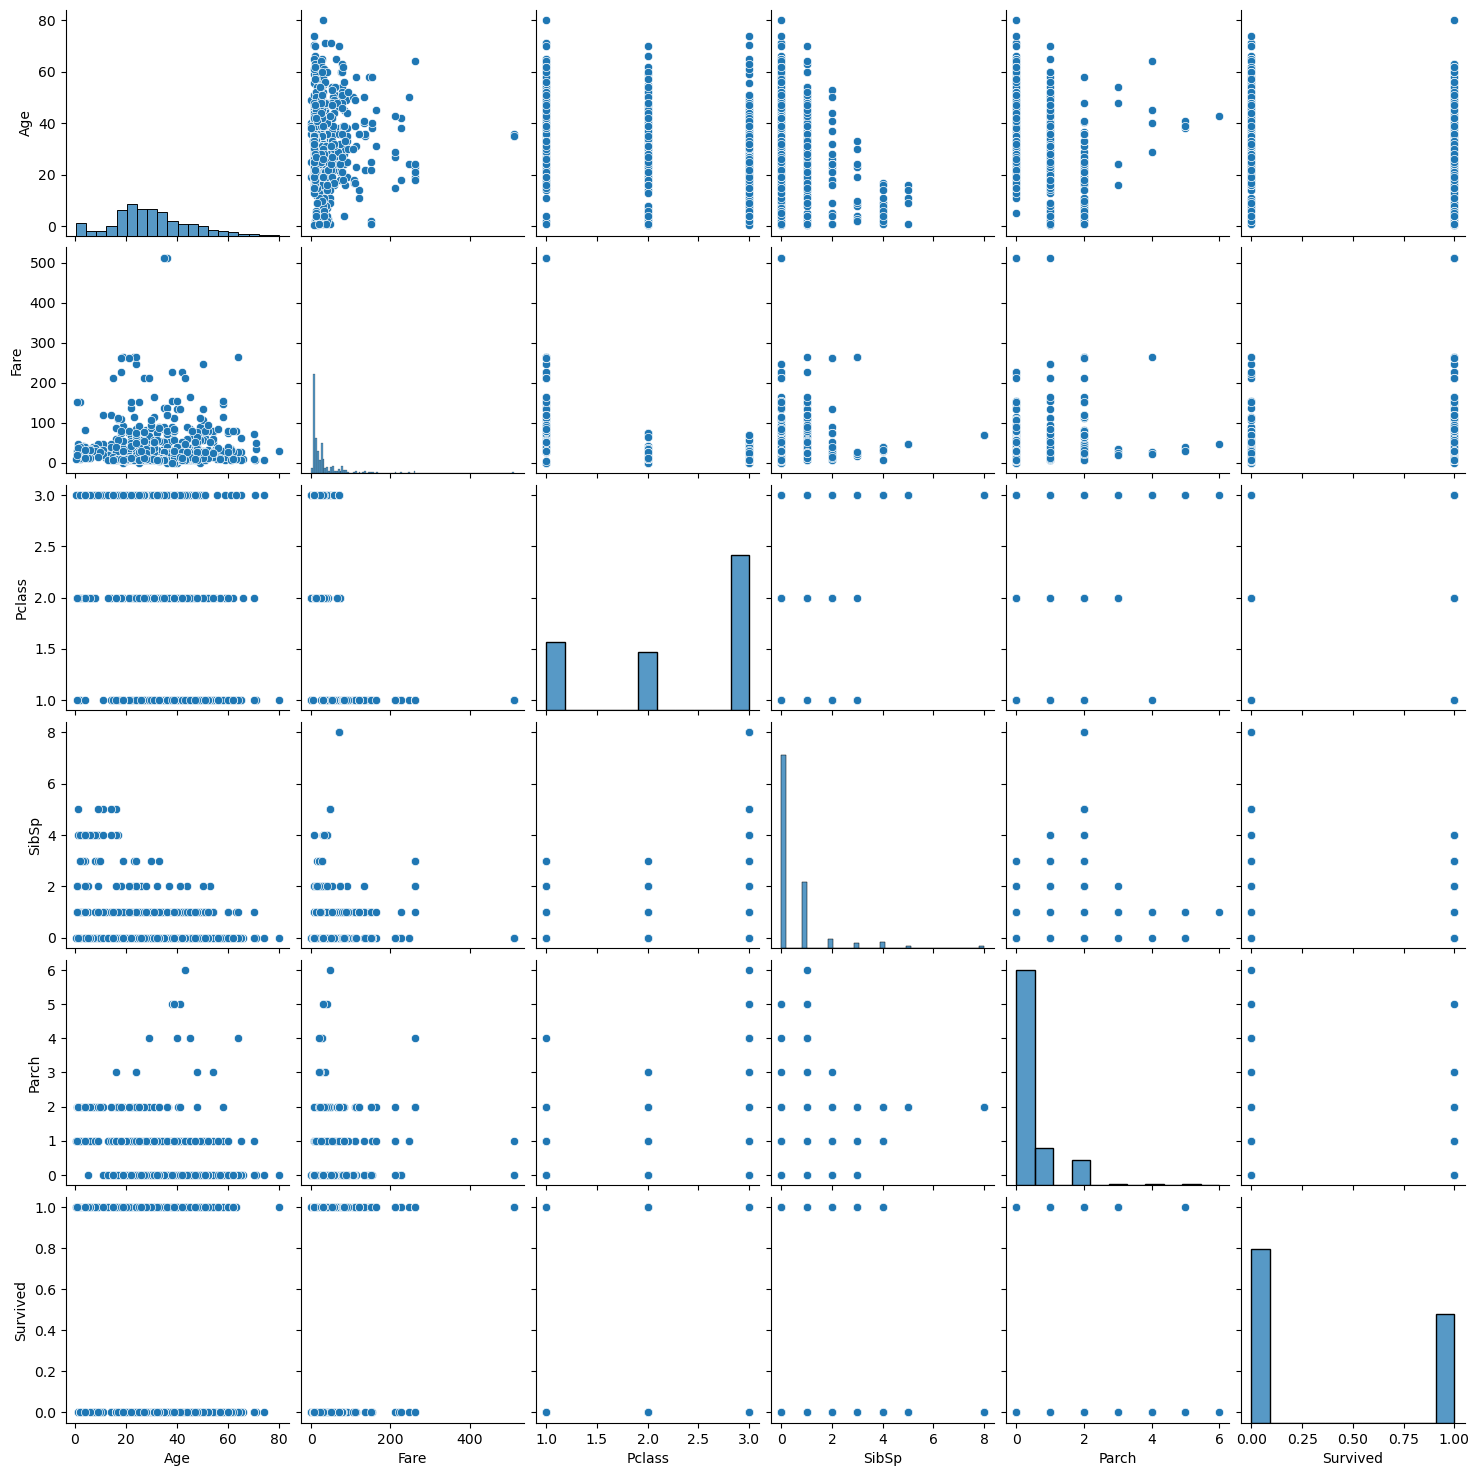

In [356]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]);

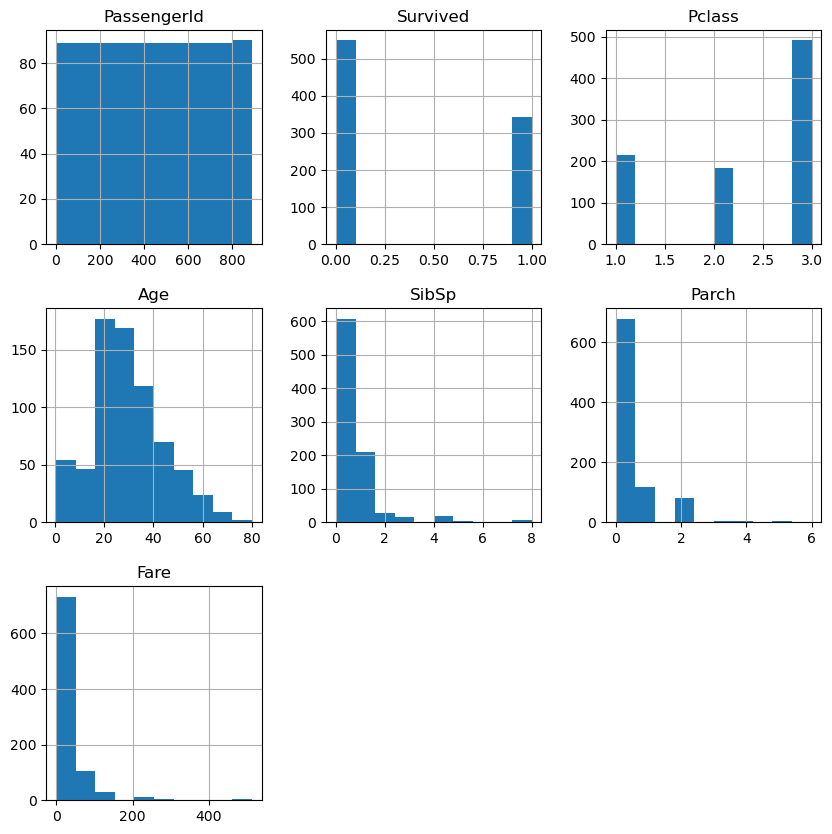

In [357]:
df.hist(figsize = (10,10));

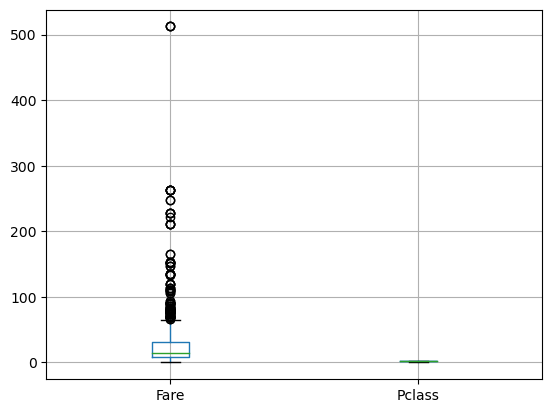

In [358]:
df.boxplot(column = ["Fare", "Pclass",]);

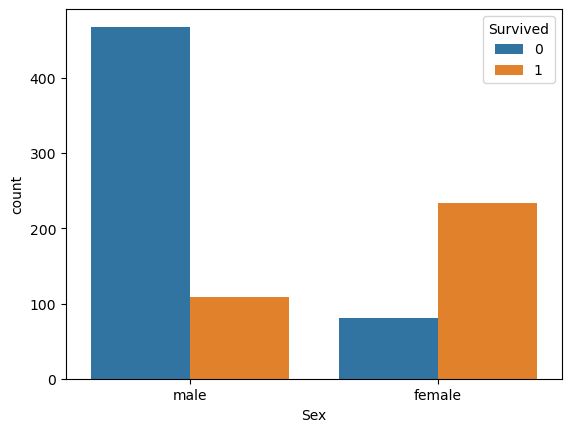

In [359]:
sns.countplot(x="Sex", hue="Survived", data=df);

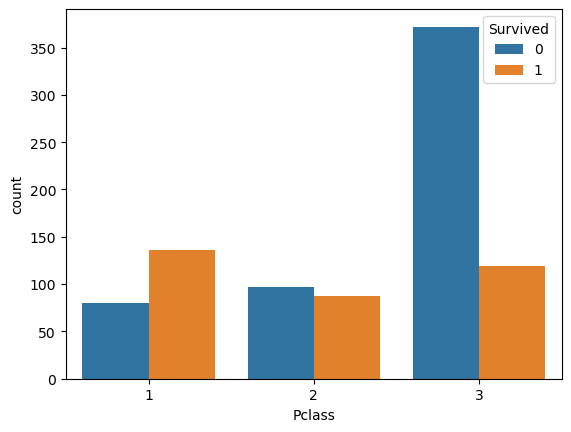

In [360]:
sns.countplot(x="Pclass", hue="Survived", data=df);

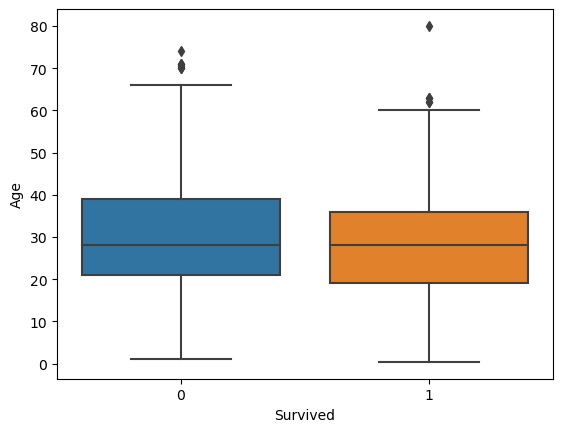

In [361]:
sns.boxplot('Survived', 'Age', data=df);


In [362]:
df['age_cat'] = df['Age'].apply(lambda age: 1 if age < 30 
                                            else 3 if age > 60 else 2);

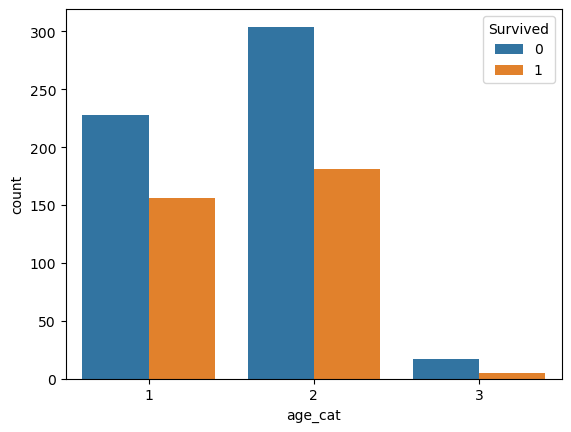

In [363]:
sns.countplot(x ='age_cat', hue ='Survived', data=df);


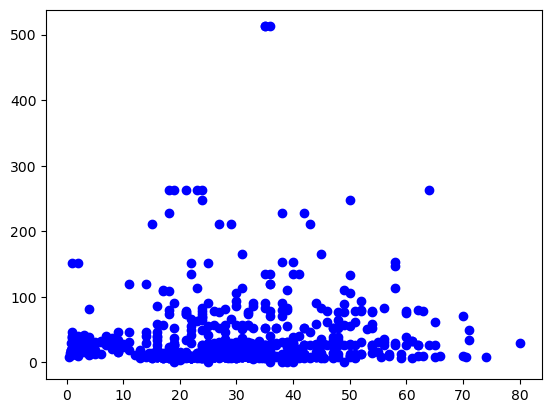

In [364]:
plt.scatter(df["Age"], df["Fare"], color = 'b')

# Machine Learning

In [365]:
x = df
y = df["Survived"]

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1, stratify=y)

<AxesSubplot:>

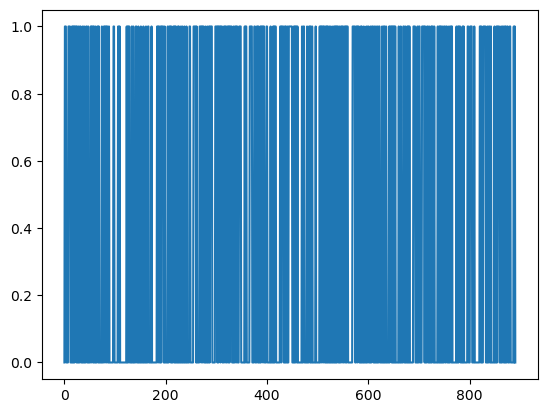

In [368]:
y.plot()

In [369]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,age_cat
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.032362
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.051589
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.207478
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.836826
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.116500
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.118527
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.056692
age_cat,0.032362,-0.051589,-0.207478,0.836826,-0.116500,-0.118527,0.056692,1.000000


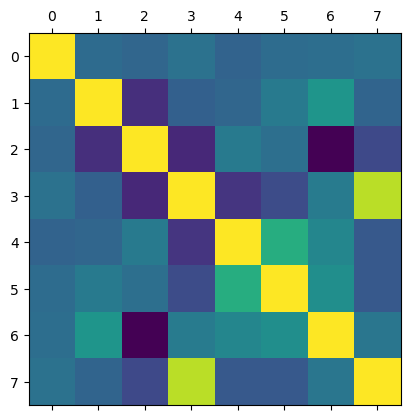

In [370]:
plt.matshow(df.corr())

In [371]:
df_cat_dummies = pd.get_dummies(df.select_dtypes("object"))

In [372]:
df_cat_dummies.shape

(891, 1724)

In [373]:
df_all = pd.concat([df_cat_dummies, df.select_dtypes("int64")], axis = 1)

In [374]:
df_all.head()

,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem",...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,SibSp,Parch,age_cat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,3,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,1,1,1,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,1,3,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,4,1,1,1,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,5,0,3,0,0,2


In [375]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_cat          0
dtype: int64

In [376]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report

In [377]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [378]:
X = df_all.drop("Survived", axis = 1)
y = df_all["Survived"]

In [379]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [380]:
xgb_cls = XGBClassifier()

In [381]:
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [382]:
y_pred = xgb_cls.predict(x_test)

In [396]:
xgb_cls.score(x_test, y_test) 

0.7574626865671642

In [389]:
from sklearn.tree import DecisionTreeClassifier

In [390]:
clf = DecisionTreeClassifier(random_state=1)

In [392]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [397]:
clf.score(x_test, y_test) # Лучшая точность

0.8208955223880597

In [398]:
from sklearn.neighbors import KNeighborsClassifier

In [400]:
np.random.seed(1)
knn_clf = KNeighborsClassifier(n_neighbors=13)

In [402]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [403]:
knn_clf.score(x_test, y_test)

0.5895522388059702